## Dataset Information

In my **bone fracture detection system** project, I use [XR-bones Dataset for Bone Fracture Detection](https://www.kaggle.com/datasets/japeralrashid/xr-bones-dataset-for-bone-fracture-detection/data) dataset to train my deep neural network algorithm.

Overview
The XR-bones dataset is a comprehensive collection of X-ray images designed to facilitate research and development in bone fracture detection using computer vision techniques. This dataset contains X-ray images categorized into two main classes: negative (no fracture) and positive (fracture present). The data is further organized by specific anatomical regions, ensuring a diverse and detailed representation of bone fractures.

Classes 

The dataset is divided into the following categories:

| Negative Classes (No Fracture) | Positive Classes (Fracture Present) |
| ------------------------------ | ----------------------------------- |
| XR_ELBOW_negative              | XR_ELBOW_positive                   |
| XR_FINGER_negative             | XR_FINGER_positive                  |
| XR_FOREARM_negative            | XR_FOREARM_positive                 |
| XR_HAND_negative               | XR_HAND_positive                    |
| XR_SHOULDER_negative           | XR_SHOULDER_positive                |

But the distribution of above categories is imbalance, so I decide to combine the classes into two categories:

1. Negative Classes (No Fracture)
2. Positive Classes (Fracture Present)


Validation Data:

In addition to the main dataset, a validation set is provided to evaluate model performance. The validation set includes 100 images randomly selected from each class, along with their corresponding labels and bounding box annotations.

Validation Directories:
- validation_classes
- validation_labels

Data Description

Each txt file contains the following information for the respective images:

- Image ID: A unique identifier for each image.
- Class Label: Indicates whether the image is classified as negative (0) or positive (1).
- Bounding Box Coordinates: The coordinates (x_min, y_min, x_max, y_max) of the bounding box surrounding the fracture area.

Applications

The XR-bones dataset is ideal for developing and evaluating automated bone fracture detection algorithms. Potential applications include:

- Medical Diagnostics: Assisting radiologists in detecting fractures quickly and accurately.
- Research: Facilitating research in computer vision, deep learning, and medical image analysis.
- Education: Serving as a valuable resource for educational purposes in medical and technological fields.
Usage

To use this dataset, follow these steps:

1. Download the Dataset: Ensure you have sufficient storage space and a reliable internet connection.
2. Extract the Files: Unzip the downloaded files to access the images and CSV annotations.
3. Load the Data: Use appropriate data loading techniques to read the images and annotations into your machine learning pipeline.
4. Train and Evaluate Models: Utilize the dataset to train and evaluate bone fracture detection models using techniques such as Convolutional Neural Networks (CNNs) and other machine learning algorithms.

## Calculate distribution of labels

In [ ]:
import cv2
import random
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# bonefractureyolo
# ROOT_DIR = 'C:\\Users\\User\\Desktop\\Data_Science_Notebook\\projects\\project__bone_fracture_detection\\bonefractureyolo'
# TRAIN_DIR = Path(ROOT_DIR).joinpath('train')
# IMAGE_DIR = Path(TRAIN_DIR).joinpath('images')

# YOLODataSet
ROOT_DIR = 'C:\\Users\\User\\Desktop\\Data_Science_Notebook\\projects\\project__bone_fracture_detection\\YOLODataSet'
IMAGE_DIR = Path(ROOT_DIR).joinpath('images')
TRAIN_DIR = Path(IMAGE_DIR).joinpath('train')

In [211]:
# bonefractureyolo
# image_paths = [imgPath for imgPath in IMAGE_DIR.glob('*.jpg')]

# YOLODataSet
image_paths = [imgPath for imgPath in TRAIN_DIR.glob('*.png')]

image_paths[:5]

[WindowsPath('C:/Users/User/Desktop/Data_Science_Notebook/projects/project__bone_fracture_detection/YOLODataSet/images/train/XR_ELBOW_negative_1.png'),
 WindowsPath('C:/Users/User/Desktop/Data_Science_Notebook/projects/project__bone_fracture_detection/YOLODataSet/images/train/XR_ELBOW_negative_10.png'),
 WindowsPath('C:/Users/User/Desktop/Data_Science_Notebook/projects/project__bone_fracture_detection/YOLODataSet/images/train/XR_ELBOW_negative_100.png'),
 WindowsPath('C:/Users/User/Desktop/Data_Science_Notebook/projects/project__bone_fracture_detection/YOLODataSet/images/train/XR_ELBOW_negative_1000.png'),
 WindowsPath('C:/Users/User/Desktop/Data_Science_Notebook/projects/project__bone_fracture_detection/YOLODataSet/images/train/XR_ELBOW_negative_1001.png')]

In [221]:
ex_path = random.choice(image_paths)
ex_label_path = str(ex_path).replace('images', 'labels').replace('.png', '.txt')
print(ex_label_path)

with open(ex_label_path, 'r') as file:
    lines = file.readlines()  # Read all lines from the file

for line in lines:
    print(line.strip().split())

C:\Users\User\Desktop\Data_Science_Notebook\projects\project__bone_fracture_detection\YOLODataSet\labels\train\XR_FINGER_positive_1827.txt
['1', '0.477778', '0.458984', '0.135802', '0.585938']


In [ ]:
def load_label_info(label_path: str) -> tuple:
    """
    Load label data from a file and convert it into a list of rectangles with their labels.

    Args:
        label_path (str): The path to the label file.

    Returns:
        tuple: 
            - str: Overall label type ("negative" or "positive").
            - list: A list of tuples, where each tuple contains:
                - label (str): The label of the rectangle.
                - coordinates (tuple): A tuple (x_center, y_center, width, height) representing
                  the bounding box of the rectangle.
    """
    rectangles = []  # List to store rectangles with their positions
    overall_label = 0 # Default is "negative"

    with open(label_path, 'r') as file:
        lines = file.readlines()  # Read all lines from the file
        for line in lines:
            # Parse the line into a list of float values
            info = line.strip().split()

            # The remaining values are coordinate information
            x_center, y_center, width, height = map(float, info[1:])
            
            # Check if the values indicate a negative label
            if not (x_center == 0.0 and y_center == 0.0 and width == 0.0 and height == 0.0):
                overall_label = 1  # Set overall label to "positive"
            
            # Append the label and bounding box to the rectangles list
            rectangles.append((overall_label, (x_center, y_center, width, height)))

    return (overall_label, rectangles)  # Return the overall label and list of labeled rectangles



In [297]:
rand_img_path = random.choice(image_paths)
rand_label_path = str(rand_img_path).replace('images', 'labels').replace('.png', '.txt')
load_label_info(rand_label_path)

(0, [(0, (0.0, 0.0, 0.0, 0.0))])

In [298]:
# image_path = random.choice(image_paths)
class_names = ['negative', 'positive']
images = []
labels = []
for image_path in image_paths:
    label_path = str(image_path).replace('images', 'labels').replace('.png', '.txt')
    try:
        label, rectangle = load_label_info(label_path)
        images.append((image_path, rectangle))
        labels.append(label)
    except: continue

len(images), len(labels)

(20501, 20501)

In [311]:
images[0]

(WindowsPath('C:/Users/User/Desktop/Data_Science_Notebook/projects/project__bone_fracture_detection/YOLODataSet/images/train/XR_ELBOW_negative_1.png'),
 [(0, (0.0, 0.0, 0.0, 0.0))])

In [300]:
labels[:5]

[0, 0, 0, 0, 0]

In [301]:
dataset = {}

for label in labels:
    if label not in dataset:
        dataset[label] = 0
    dataset[label] += 1

dataset

{0: 14589, 1: 5912}

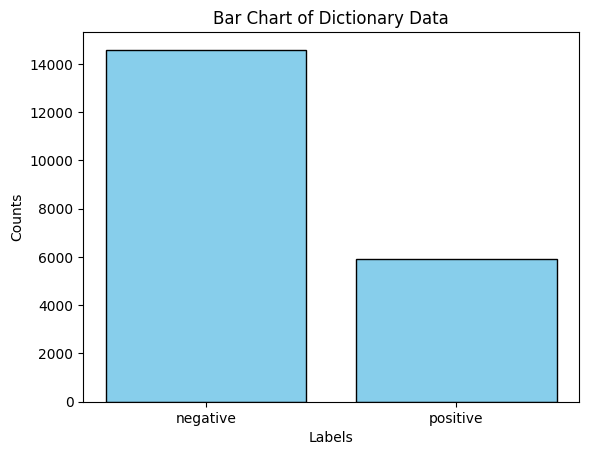

In [303]:
# Extract keys and values
keys = []
values = []
class_names = ['negative', 'positive']
# class_names = ['XR_ELBOW_positive', 'XR_FINGER_positive', 'XR_FOREARM_positive', 'XR_HAND_positive', 'XR_SHOULDER_positive', 
#                'XR_ELBOW_negative', 'XR_FINGER_negative', 'XR_FOREARM_negative', 'XR_HAND_negative', 'XR_SHOULDER_negative']

# class_names = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'humerus', 'shoulder fracture', 'wrist positive']

for key, value in dataset.items():
    keys.append(class_names[int(key)])
    values.append(value)

# Create the bar chart
plt.bar(keys, values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.xticks(keys)
plt.title('Bar Chart of Dictionary Data')

# Display the chart
plt.show()

## Images Visualization

In [378]:
def calculate_bounding_box(img_width: int, img_height: int, x_center: float, y_center: float, width: float, height: float):
    """
    Convert normalized bounding box coordinates to pixel coordinates.

    Args:
        img_width (int): The width of the image in pixels.
        img_height (int): The height of the image in pixels.
        x_center (float): The normalized x-coordinate of the box center (0 to 1).
        y_center (float): The normalized y-coordinate of the box center (0 to 1).
        width (float): The normalized width of the box (0 to 1).
        height (float): The normalized height of the box (0 to 1).

    Returns:
        tuple: Bounding box pixel coordinates as (x_min, y_min, x_max, y_max).
    """
    x_center_px = int(x_center * img_width)
    y_center_px = int(y_center * img_height)
    box_width_px = int(width * img_width)
    box_height_px = int(height * img_height)

    x_min = x_center_px - box_width_px // 2
    y_min = y_center_px - box_height_px // 2
    x_max = x_center_px + box_width_px // 2
    y_max = y_center_px + box_height_px // 2

    return x_min, y_min, x_max, y_max


def plot_multiple_images_with_rectangles(images_selected:list, 
                                         class_names:list=['negative', 'positive'], 
                                         figsize:tuple=(15, 15), 
                                         fig_title:str='Medical Image Analysis For Fracture Detection'):
    """
    Plot multiple images with their rectangle annotations in a grid using matplotlib.
    
    Args:
        images_selected (list): A list of tuples, where each tuple contains:
            - imgPath (str): The file path to the image.
            - rectangles (list): A list of bounding box data, where each bounding box is a tuple:
                (class_id, (x_center, y_center, width, height)), where:
                - class_id (int): The class index of the bounding box.
                - x_center (float): The normalized x-coordinate of the bounding box center (0 to 1).
                - y_center (float): The normalized y-coordinate of the bounding box center (0 to 1).
                - width (float): The normalized width of the bounding box (0 to 1).
                - height (float): The normalized height of the bounding box (0 to 1).
        class_names (list, optional): A list of class names corresponding to the `class_id` values in the rectangles.
                                      Defaults to ['negative', 'positive'].
        figsize (tuple, optional): The size of the overall figure in inches. Defaults to (15, 15).
        fig_title (str, optional): The overall title for the entire figure. Defaults to 'Medical Image Analysis For Fracture Detection'.
    """
    # Calculate the side length of the grid (assume the number of images is a perfect square)
    side = np.sqrt(len(images_selected)).astype(np.int32)

    # Create a grid of subplots
    fig, axes = plt.subplots(side, side, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    for idx, (imgPath, rectangles) in enumerate(images_selected):
        # Read the image using OpenCV
        image = cv2.imread(imgPath)
        if image is None:
            raise ValueError(f"Image not found at path: {image_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB for matplotlib
        img_height, img_width, _ = image.shape  # Get image dimensions

        # Class title
        class_title = ''

        # Draw each rectangle and its label on the image
        for class_id, (x_center, y_center, width, height) in rectangles:
            # Ensure class_id is an integer
            class_id = int(class_id)

            # Convert bounding box to pixel coordinates
            x_min, y_min, x_max, y_max = calculate_bounding_box(img_width, img_height, x_center, y_center, width, height)

            # Draw the bounding box and center point
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)  # Blue box

            # Add class label text
            class_title = class_names[class_id]
            cv2.putText(image, class_title, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 
                        fontScale=0.5, color=(255, 255, 255), thickness=1)
        
        # Plot the image in the current subplot
        ax = axes[idx]
        ax.imshow(image)
        ax.axis('off')  # Turn off axes for a cleaner visualization
        
        # Add a title for the subplot
        ax.set_title(f"Image {idx + 1}: {'Health' if class_title == 'negative' else 'fracture'}")

    # Hide any unused axes (in case the number of images is less than the grid size)
    for ax in axes[len(images_selected):]:
        ax.axis('off')

    # Add an overall title for the figure
    fig.suptitle(fig_title, fontsize=16, fontweight='bold', y=0.98)
    
    # Adjust layout for better spacing and show the figure
    # A rectangle in normalized figure coordinates into which the whole subplots area (including labels) will fit
    # left, bottom, right, top
    plt.tight_layout(rect=[0, 0, 1, 0.95]) 
    plt.show()

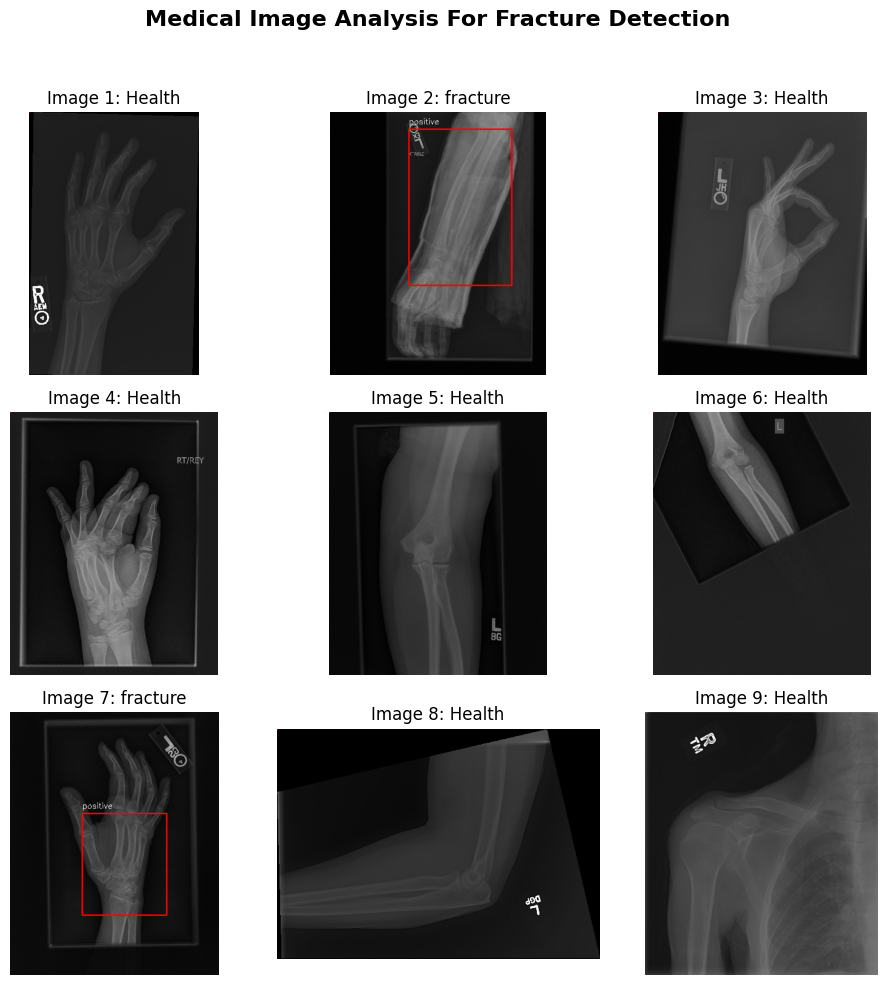

In [385]:
images_selected = random.choices(images, k=9)
plot_multiple_images_with_rectangles(images_selected, figsize=(10, 10))